In [1]:
#Loading our dependents
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#loading our data
ucl_1 = pd.read_csv('C:/Users/user pc/Downloads/UCL data/UCL_AllTime_Performance_Table - UCL_Alltime_Performance_Table.csv')
ucl_2 = pd.read_csv('C:/Users/user pc/Downloads/UCL data/UCL_Finals_1955-2023 - UCL_Finals_1955-2023.csv')
ucl_1.head()

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern München,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171


In [15]:
#viewing the second data
ucl_2.head()

,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621",NaN


In [16]:
ucl_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       333 non-null    float64
 1   Team    354 non-null    object 
 2   M.      354 non-null    int64  
 3   W       354 non-null    int64  
 4   D       354 non-null    int64  
 5   L       354 non-null    int64  
 6   goals   354 non-null    object 
 7   Dif     354 non-null    int64  
 8   Pt.     354 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 25.0+ KB


In [17]:
ucl_1.describe()

,#,M.,W,D,L,Dif,Pt.
count,333.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,170.768769,33.254237,13.039548,7.169492,13.039548,0.000000,0.000000
std,100.863698,61.581865,31.468472,13.729255,18.669137,52.566267,52.566267
min,1.000000,2.000000,0.000000,0.000000,0.000000,-97.000000,-97.000000
25%,84.000000,4.000000,0.000000,0.000000,2.000000,-14.000000,-14.000000
50%,168.000000,8.000000,2.000000,2.000000,5.000000,-5.000000,-5.000000
75%,255.000000,31.500000,9.000000,6.000000,14.000000,0.000000,0.000000
max,354.000000,486.000000,291.000000,85.000000,110.000000,533.000000,533.000000


In [18]:
#Renaming the data columns
ucl_1.rename(columns ={'M.': 'matches','W': 'wins','D': 'draws','L': 'losses',
                      'Dif': 'goal_difference','Pt.': 'points'}, inplace=True)
ucl_1.head()

,#,Team,matches,wins,draws,losses,goals,goal_difference,points
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern München,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171


In [19]:
#dropping columns
ucl_1.drop('#',axis=1,inplace=True)
ucl_1.head()

,Team,matches,wins,draws,losses,goals,goal_difference,points
0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,Bayern München,388,231,78,79,817:24:00,427,427
2,FC Barcelona,341,196,77,68,675:51:00,319,319
3,Manchester United,289,153,69,67,524:56:00,224,224
4,Juventus,297,151,68,78,472:57:00,171,171


In [46]:
lam =  lambda x : x.split(':')[0]
ucl_1['goals_scored'] = ucl_1['goals'].apply(lam)
ucl_1.head()

,Team,matches,wins,draws,losses,goals,goal_difference,points,goals_scored
0,Real Madrid,486,291,85,110,1076:55:00,533,533,1076
1,Bayern München,388,231,78,79,817:24:00,427,427,817
2,FC Barcelona,341,196,77,68,675:51:00,319,319,675
3,Manchester United,289,153,69,67,524:56:00,224,224,524
4,Juventus,297,151,68,78,472:57:00,171,171,472


In [47]:
ucl_1.drop('goals',axis=1,inplace=True)
ucl_1.head()

,Team,matches,wins,draws,losses,goal_difference,points,goals_scored
0,Real Madrid,486,291,85,110,533,533,1076
1,Bayern München,388,231,78,79,427,427,817
2,FC Barcelona,341,196,77,68,319,319,675
3,Manchester United,289,153,69,67,224,224,524
4,Juventus,297,151,68,78,171,171,472


In [49]:
ucl_1.drop('points',axis=1,inplace=True)
ucl_1.head()

,Team,matches,wins,draws,losses,goal_difference,goals_scored
0,Real Madrid,486,291,85,110,533,1076
1,Bayern München,388,231,78,79,427,817
2,FC Barcelona,341,196,77,68,319,675
3,Manchester United,289,153,69,67,224,524
4,Juventus,297,151,68,78,171,472


In [50]:
#Cleaining table 2
ucl_2.head()

,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621",NaN


In [55]:
ucl_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       69 non-null     object
 1   country_win  69 non-null     object
 2   Winners      69 non-null     object
 3   Score        69 non-null     object
 4   Runners-up   69 non-null     object
 5   country_sec  69 non-null     object
 6   Venue        69 non-null     object
 7   Attend­ance  69 non-null     object
 8   Notes        18 non-null     object
dtypes: object(9)
memory usage: 5.0+ KB


In [51]:
#renaming data columns
ucl_2.rename(columns ={'Country': 'country_win','Country.1': 'country_sec'}, inplace=True)
ucl_2.head()

,Season,country_win,Winners,Score,Runners-up,country_sec,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621",NaN


<Axes: xlabel='Notes', ylabel='count'>

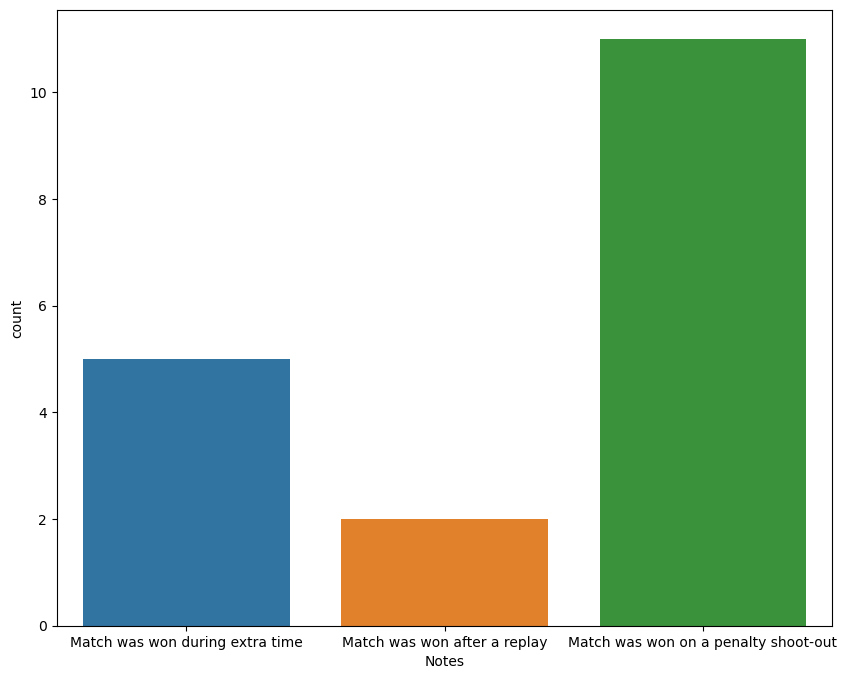

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(x='Notes', data=ucl_2)

In [57]:
ucl_2.isna().sum()

Season          0
country_win     0
Winners         0
Score           0
Runners-up      0
country_sec     0
Venue           0
Attend­ance     0
Notes          51
dtype: int64

In [58]:
#checki9ng the percentage of missing data
100 * ucl_2.isna().sum() / len(ucl_2)

Season          0.000000
country_win     0.000000
Winners         0.000000
Score           0.000000
Runners-up      0.000000
country_sec     0.000000
Venue           0.000000
Attend­ance     0.000000
Notes          73.913043
dtype: float64

In [59]:
ucl_2.drop('Notes',axis=1,inplace=True)
ucl_2.head()

,Season,country_win,Winners,Score,Runners-up,country_sec,Venue,Attend­ance
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239"
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000"
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000"
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000"
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621"


In [60]:
ucl_1.head()

,Team,matches,wins,draws,losses,goal_difference,goals_scored
0,Real Madrid,486,291,85,110,533,1076
1,Bayern München,388,231,78,79,427,817
2,FC Barcelona,341,196,77,68,319,675
3,Manchester United,289,153,69,67,224,524
4,Juventus,297,151,68,78,171,472


In [61]:
#saving our dataframes
ucl_1.to_csv(r'C:\Users\user pc\Downloads\UCL data/UCL_all_time_performance_cleaned.csv')
ucl_2.to_csv(r'C:\Users\user pc\Downloads\UCL data/UCL_finals_cleaned.csv')